In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import yfinance as yf        
from sklearn.metrics import accuracy_score          

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import yfinance as yf        
from sklearn.metrics import accuracy_score          

In [4]:
start_date = '2015-01-01'
end_date = date.today()

stock_symbol = 'GOOG'

data = yf.download(stock_symbol, start=start_date, end=end_date)



c:\Users\91992\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [5]:
import yfinance as yf
from datetime import datetime, date

start_date = '2015-01-01'
end_date = date.today()

stock_symbol = 'GOOG'

data = yf.download(stock_symbol, start=start_date, end=end_date)

print(data.head())


c:\Users\91992\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  26.378078  26.490770  26.133251  26.168653  26.168653  28951268
2015-01-05  26.091366  26.144720  25.582764  25.623152  25.623152  41196796
2015-01-06  25.679497  25.738087  24.983908  25.029282  25.029282  57998800
2015-01-07  25.280592  25.292759  24.914099  24.986401  24.986401  41301082
2015-01-08  24.831326  25.105074  24.482782  25.065184  25.065184  67071641


In [6]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [7]:
data.reset_index(inplace=True)

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2356 non-null   datetime64[ns]
 1   Open       2356 non-null   float64       
 2   High       2356 non-null   float64       
 3   Low        2356 non-null   float64       
 4   Close      2356 non-null   float64       
 5   Adj Close  2356 non-null   float64       
 6   Volume     2356 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 129.0 KB


In [9]:
ma_100_days = data.Close.rolling(100).mean()

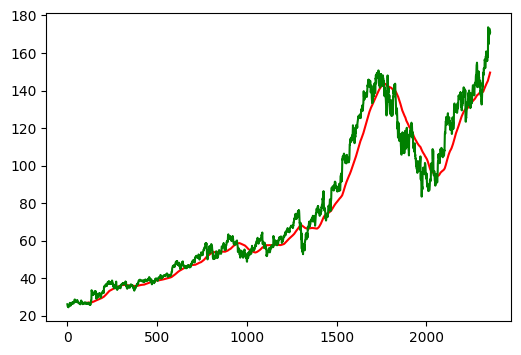

In [10]:
plt.figure(figsize=(6,4))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

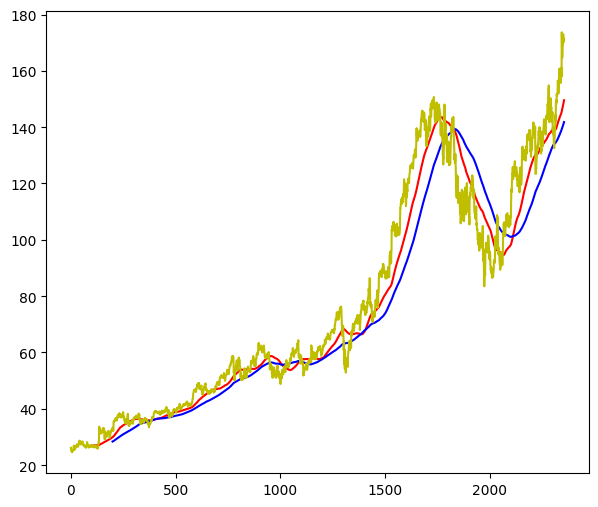

In [12]:
plt.figure(figsize=(7,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'y')
plt.show()

In [13]:
data.dropna(inplace=True)

In [14]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
data_train.shape[0]

1884

In [16]:
data_test.shape[0]

472

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

    

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\91992\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Define and compile the model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])



In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step - loss: 0.0644
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 0.0078
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - loss: 0.0055
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 0.0051
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 0.0053
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0058
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - loss: 0.0045
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 0.0046
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 0.0041
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 0.0045
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 0.0031
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 0.0043
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 0.0041
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0037
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [27]:
pas_100_days = data_train.tail(100)

In [28]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)


In [29]:
data_test_scale  =  scaler.fit_transform(data_test)

In [30]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [31]:
y_predict = model.predict(x)

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step


In [32]:
x,y = np.array(x), np.array(y)

predict = model.predict(x)

scale = 1/scaler.scale_

predict = predict * scale
y = y * scale

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [33]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predict)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [35]:
scale =1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

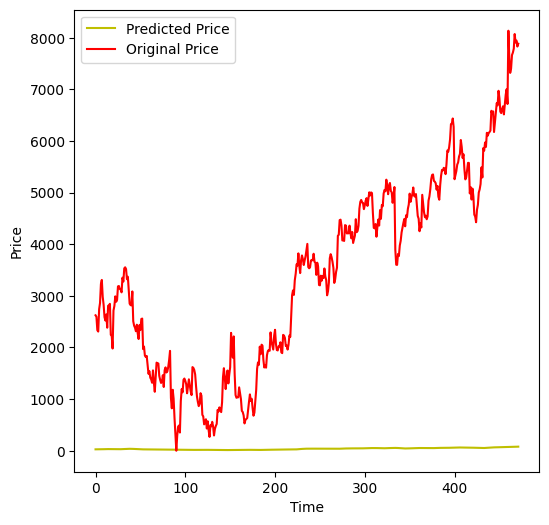

In [38]:
plt.figure(figsize=(6,6))
plt.plot(y_predict, 'y', label = 'Predicted Price')
plt.plot(y, 'r', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
model.save('Stock Predictions Model.keras')

In [40]:
# Prepare data for next day prediction
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [41]:
# Make prediction for the next day
next_day_input = data_test_scale[-100:].reshape(1, 100, 1)
next_day_prediction_scaled = model.predict(next_day_input)
next_day_prediction = next_day_prediction_scaled * scaler.scale_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [42]:
import streamlit as st

ModuleNotFoundError: No module named 'altair.vegalite.v4'

In [ ]:
# Display the predicted price for the next day
import streamlit as st
st.subheader('Forecast for the Next Day')
st.write('Predicted Price:', next_day_prediction[0][0])

ModuleNotFoundError: No module named 'altair.vegalite.v4'

In [ ]:
# Determine if the next day's price will be higher or lower
current_price = data_test.iloc[-1]['Close']
if next_day_prediction[0][0] > current_price:
    prediction_result = "Higher"
else:
    prediction_result = "Lower"

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predict)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the metrics
st.subheader('Model Performance Metrics')
st.write(f'Mean Absolute Error (MAE): {mae}')
st.write(f'Mean Squared Error (MSE): {mse}')
st.write(f'Root Mean Squared Error (RMSE): {rmse}')


NameError: name 'st' is not defined

In [ ]:
# Convert predictions to binary labels
predicted_labels = np.where(predict[1:] > predict[:-1], 1, 0)
actual_value = np.where(y[1:] > y[:-1], 1, 0)

In [ ]:
model.save('Stock Predictions Model.keras')